In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy import stats
from datetime import date
import warnings
warnings.filterwarnings("ignore")

### Importing CSV File

In [3]:
Marketing_Data = pd.read_csv(r"C:\Users\17234\Desktop\Data Science\Applied Data science with Python\marketing_data.csv")

## Variable  -	Description
* ID -	Customer's unique identifier
* Year_Birth -	Customer's birth year
* Education -	Customer's education level
* Marital_Status -	Customer's marital status
* Income - 	Customer's yearly household income
* Kidhome -	number of small children in customer's household number of teenagers in customer's household
* Teenhome -	no of teenagers in customer's house
* Dt_Customer	- Date of customer's enrollment with the company
* Recency	- number of days since the last purchase
* MntWines	- amount spent on wine in last 2 years
* MntFruits	- amount spent on fruits in last 2 years
* MntMeatProducts -	amount spent on meat products in last 2 years
* MntFishProducts -	amount spent on fish products in last 2 years
* MntSweetProducts -	amount spent on sweet products in last 2 years
* MntGoldProds- 	amount spent on gold in last 2 years
* NumDealsPurchases	- no of purchases made with discount
* NumWebPurchases- 	no of purchases made through company's website
* NumCatalogPurchases	- no of purchases made using catelogue
* NumStorePurchases	- no of purchases made directly in store
* NumWebVisitsMonth- 	no of visits to company's website in the last month
* AcceptedCmp3-	1 if the customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4-	1 if the customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5-	1 if the customer accepted the offer in the 5th campaign, 0 otherwise
* AcceptedCmp1-	1 if the customer accepted the offer in the first campaign, 0 otherwise
* AcceptedCmp2-	1 if the customer accepted the offer in the 2nd campaign, 0 otherwise
* Response	-1 if the customer accepted the offer in the last campaign, 0 otherwise
* Complain	-1 if customer complained in the last 2 years
* Country	- Customer's location

In [5]:
Marketing_Data.shape

(2240, 28)

In [6]:
Marketing_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [7]:
Marketing_Data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

### 1. Converted Dt_Customer field's Datatype String to Datetime

In [9]:
Marketing_Data['Dt_Customer']= pd.to_datetime(Marketing_Data['Dt_Customer'])

In [10]:
Marketing_Data['Dt_Customer']

0      2014-06-16
1      2014-06-15
2      2014-05-13
3      2014-05-11
4      2014-04-08
          ...    
2235   2013-03-07
2236   2013-01-22
2237   2012-12-03
2238   2012-11-29
2239   2012-09-01
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

### 1. Unnecessary White Space Removed in Column Names

In [12]:
Marketing_Data.columns = Marketing_Data.columns.str.replace(" ","") 

In [13]:
Marketing_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   object        
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [14]:
Marketing_Data['Income']

0       $84,835.00 
1       $57,091.00 
2       $67,267.00 
3       $32,474.00 
4       $21,474.00 
           ...     
2235    $66,476.00 
2236    $31,056.00 
2237    $46,310.00 
2238    $65,819.00 
2239    $94,871.00 
Name: Income, Length: 2240, dtype: object

### 1. Removing $ and commas from Numeric Data and converting the object dtype into float

In [16]:
Marketing_Data['Income'] = Marketing_Data['Income'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [17]:
Marketing_Data['Income']

0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2235    66476.0
2236    31056.0
2237    46310.0
2238    65819.0
2239    94871.0
Name: Income, Length: 2240, dtype: float64

In [18]:
#Marketing_Data['Income']=Marketing_Data['Income'].astype(float)
Marketing_Data['Income'].isnull().sum()

24

In [19]:
Marketing_Data.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,SP
5,7348,1958,PhD,Single,71691.0,0,0,2014-03-17,0,336,...,5,2,0,0,0,0,0,1,0,SP
6,4073,1954,2n Cycle,Married,63564.0,0,0,2014-01-29,0,769,...,7,6,1,0,0,0,0,1,0,GER
7,1991,1967,Graduation,Together,44931.0,0,1,2014-01-18,0,78,...,3,5,0,0,0,0,0,0,0,SP
8,4047,1954,PhD,Married,65324.0,0,1,2014-01-11,0,384,...,9,4,0,0,0,0,0,0,0,US
9,9477,1954,PhD,Married,65324.0,0,1,2014-01-11,0,384,...,9,4,0,0,0,0,0,0,0,IND


### 2. Income Mean Calculated Group by 'Education' & 'Marital_Status'

In [21]:
mean_income=Marketing_Data.groupby(['Education','Marital_Status'])['Income'].mean()
mean_income

Education   Marital_Status
2n Cycle    Divorced          49395.130435
            Married           46201.100000
            Single            53673.944444
            Together          44736.410714
            Widow             51392.200000
Basic       Divorced           9548.000000
            Married           21960.500000
            Single            18238.666667
            Together          21240.071429
            Widow             22123.000000
Graduation  Absurd            79244.000000
            Alone             34176.000000
            Divorced          54526.042017
            Married           50800.258741
            Single            51322.182927
            Together          55758.480702
            Widow             54976.657143
Master      Absurd            65487.000000
            Alone             61331.000000
            Divorced          50331.945946
            Married           53286.028986
            Single            53530.560000
            Together       

### 2.User Defined Function for missing values imputation of Income on the basis of Marital Status and Education.

In [23]:
mean_income=Marketing_Data.groupby(['Education','Marital_Status'])['Income'].mean()

def income_function(row):
    if pd.isnull(row['Income']):
        groupkey= (row['Education'],row['Marital_Status'])
        if groupkey in mean_income.index:
            return mean_income.loc[groupkey]
        else:
            return mean_income.mean()
    return row['Income']
Marketing_Data['Income'] =Marketing_Data.apply(income_function,axis=1)

In [24]:
Marketing_Data['Income'].isnull().sum()   ## checked that no null values left in Income Column

0

### 3. Total number of children

In [26]:
Marketing_Data['Total_Children']= Marketing_Data['Kidhome']+Marketing_Data['Teenhome']

In [27]:
Marketing_Data[['Total_Children','Kidhome','Teenhome']]

,Total_Children,Kidhome,Teenhome
0,0,0,0
1,0,0,0
2,1,0,1
3,2,1,1
4,1,1,0
...,...,...,...
2235,1,0,1
2236,1,1,0
2237,1,1,0
2238,0,0,0


### 3. Age Calculation Derived Field from Birth Year

In [29]:
Today_year= date.today().year

In [30]:
Today_year

2025

In [31]:
Marketing_Data['Age']= Today_year - Marketing_Data['Year_Birth']

In [32]:
Marketing_Data[['Age','Year_Birth']]

,Age,Year_Birth
0,55,1970
1,64,1961
2,67,1958
3,58,1967
4,36,1989
...,...,...
2235,49,1976
2236,48,1977
2237,49,1976
2238,47,1978


### 3. Calculation of Total Spending

In [34]:
Marketing_Data['Total_Spending']= Marketing_Data['MntWines']+Marketing_Data['MntFruits']+Marketing_Data['MntMeatProducts']
+Marketing_Data['MntFishProducts']+Marketing_Data['MntSweetProducts']+Marketing_Data['MntGoldProds']

0       518
1        44
2        47
3         0
4        45
       ... 
2235    173
2236     27
2237     34
2238    377
2239    332
Length: 2240, dtype: int64

In [35]:
Marketing_Data[['Total_Spending','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]

,Total_Spending,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,672,189,104,379,111,189,218
1,533,464,5,64,7,0,37
2,204,134,11,59,15,2,30
3,11,10,0,1,0,0,0
4,46,6,16,24,11,0,34
...,...,...,...,...,...,...,...
2235,516,372,18,126,47,48,78
2236,28,5,10,13,3,8,16
2237,275,185,2,88,15,5,14
2238,1006,267,38,701,149,165,63


### 3. a) Total purchases from the number of transactions across the three channels

In [37]:
Marketing_Data['Total_Purchases']=Marketing_Data['NumWebPurchases']+Marketing_Data['NumCatalogPurchases']+Marketing_Data['NumStorePurchases']+Marketing_Data['NumDealsPurchases']

In [38]:
Marketing_Data[['Total_Purchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumDealsPurchases']]

,Total_Purchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases
0,15,4,4,6,1
1,18,7,3,7,1
2,11,3,2,5,1
3,4,1,0,2,1
4,8,3,1,2,2
...,...,...,...,...,...
2235,20,5,2,11,2
2236,5,1,0,3,1
2237,14,6,1,5,2
2238,20,5,4,10,1


### 4. Generate box plots and histograms to gain insights into the distributions and identify outliers. Implement outlier treatment as needed.

## Outlier Treatment for Income

In [41]:
Marketing_Data['Income'].describe()

count      2240.000000
mean      52248.748825
std       25039.981052
min        1730.000000
25%       35538.750000
50%       51381.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

(array([ 24.,  28., 101., 175., 220., 234., 226., 227., 212., 231., 199.,
        190., 109.,  43.,   8.,   4.,   1.,   0.,   0.,   0.,   0.,   0.,
          1.,   5.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([  1730.  ,   8379.36,  15028.72,  21678.08,  28327.44,  34976.8 ,
         41626.16,  48275.52,  54924.88,  61574.24,  68223.6 ,  74872.96,
         81522.32,  88171.68,  94821.04, 101470.4 , 108119.76, 114769.12,
        121418.48, 128067.84, 134717.2 , 141366.56, 148015.92, 154665.28,
        161314.64, 167

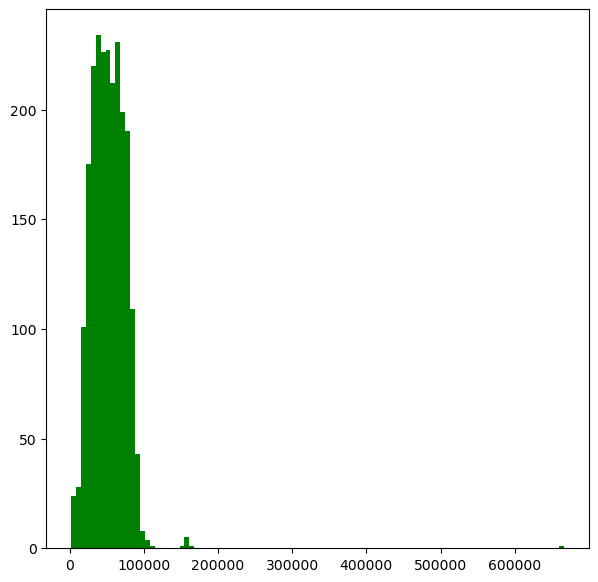

In [42]:
plt.figure(figsize=(7,7))
plt.hist(x=Marketing_Data['Income'],bins=100,color="green")

### Findings: Outliers present in the data.It is Right-skewed Chart, as the skewness is in the right side. Which means the data is biased and need to remove outliers to reduce biasness.

<Axes: xlabel='Income'>

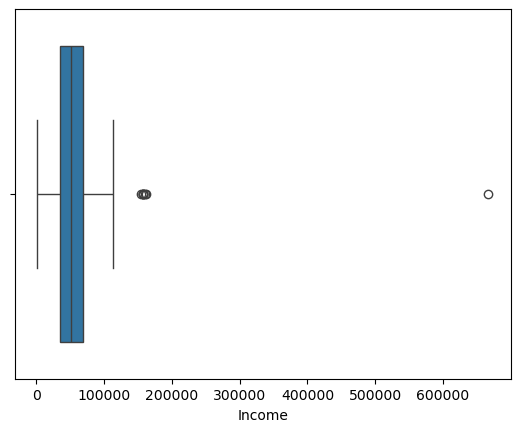

In [44]:
sns.boxplot(x='Income',data= Marketing_Data)

In [45]:
def outlier_treatment(Income):
    sorted(Income)
    Q1,Q3 = np.percentile(Income,[25,75])
    IQR= Q3-Q1
    Lower_Range,Upper_Range= Q1-(1.5*IQR) , Q3+(1.5*IQR)
    return Lower_Range,Upper_Range

In [46]:
lower,upper= outlier_treatment(Marketing_Data['Income'])

In [47]:
lower   ## Data to be taken should be greater than lower

-13587.75

In [48]:
upper   ## Data to be taken should be less than upper

117416.25

In [49]:
Marketing_Data=Marketing_Data[(Marketing_Data['Income']>lower)&(Marketing_Data['Income']<upper)]

In [50]:
Marketing_Data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Total_Children,Age,Total_Spending,Total_Purchases
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,1,0,SP,0,55,672,15
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,1,1,0,CA,0,64,533,18
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,US,1,67,204,11
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,0,AUS,2,58,11,4
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,0,0,0,1,0,SP,1,36,46,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,...,0,0,0,0,0,US,1,49,516,20
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,0,0,0,0,0,SP,1,48,28,5
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-12-03,99,185,...,0,0,0,0,0,SP,1,49,275,14
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,0,0,0,0,0,IND,0,47,1006,20


<Axes: xlabel='Income'>

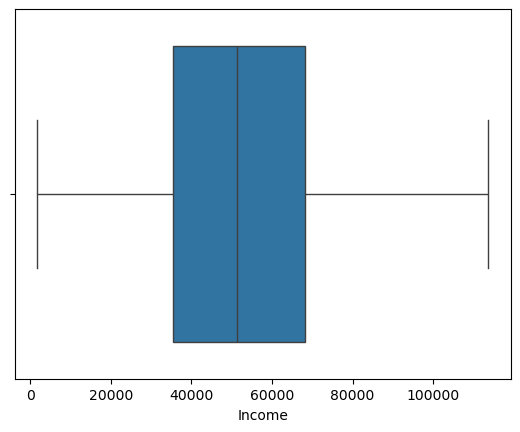

In [51]:
sns.boxplot(x='Income',data= Marketing_Data)

(array([ 37., 185., 333., 401., 370., 370., 331., 174.,  28.,   3.]),
 array([  1730. ,  12930.4,  24130.8,  35331.2,  46531.6,  57732. ,
         68932.4,  80132.8,  91333.2, 102533.6, 113734. ]),
 <BarContainer object of 10 artists>)

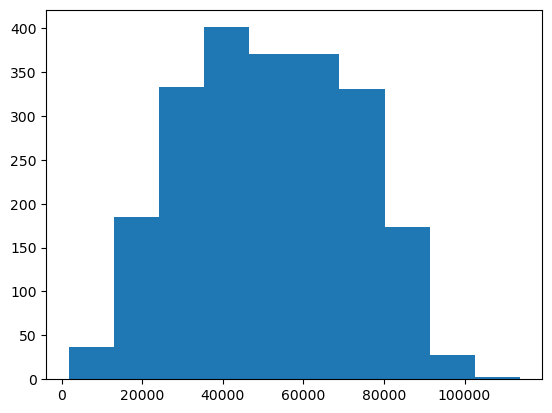

In [52]:
plt.hist(Marketing_Data['Income'])

In [53]:
Marketing_Data.shape

(2232, 32)

## Outlier treatment for Age

In [55]:
lower,upper = outlier_treatment(Marketing_Data['Age'])

In [56]:
lower

21.0

In [57]:
upper

93.0

In [58]:
Marketing_Data=Marketing_Data[(Marketing_Data['Age']>lower)&(Marketing_Data['Age']<upper)]

In [59]:
Marketing_Data.shape

(2229, 32)

<Axes: ylabel='Age'>

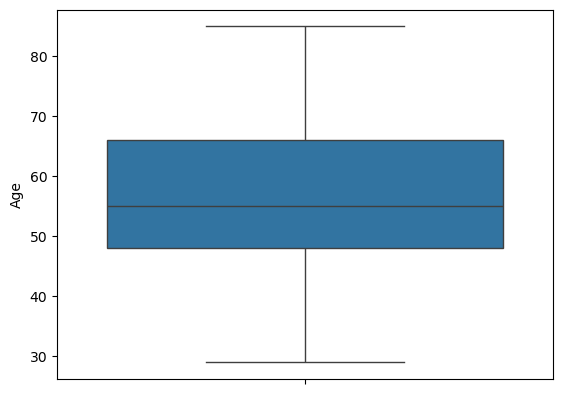

In [60]:
sns.boxplot(Marketing_Data['Age'])

## Outliers Removed. Now the data follows Normal Distribution Pattern.

### 5. Ordinal and one-hot encoding based on the various types of categorical variables 

In [63]:
Marketing_Data.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Total_Children,Age,Total_Spending,Total_Purchases
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,1,0,SP,0,55,672,15
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,1,1,0,CA,0,64,533,18
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,US,1,67,204,11
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,0,AUS,2,58,11,4
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,0,0,0,1,0,SP,1,36,46,8
5,7348,1958,PhD,Single,71691.0,0,0,2014-03-17,0,336,...,0,0,0,1,0,SP,0,67,877,17
6,4073,1954,2n Cycle,Married,63564.0,0,0,2014-01-29,0,769,...,0,0,0,1,0,GER,0,71,1101,28
7,1991,1967,Graduation,Together,44931.0,0,1,2014-01-18,0,78,...,0,0,0,0,0,SP,1,58,89,7
8,4047,1954,PhD,Married,65324.0,0,1,2014-01-11,0,384,...,0,0,0,0,0,US,1,71,486,20
9,9477,1954,PhD,Married,65324.0,0,1,2014-01-11,0,384,...,0,0,0,0,0,IND,1,71,486,20


### Using One-Hot Encoding, changed the column Response having 0 and 1 values converted in true and false. Dropped the First column which was Response_0. Kept Response_1 Column and changed its name to Response_Received.
### Similarly for Complain column having 0 and 1 values converted in true and false. Dropped the First column which was Complain_0. Kept Complain_1 Column and changed its name to Complain_Received.

In [65]:
Marketing_Data= pd.get_dummies(data=Marketing_Data,columns=['Response','Complain'],drop_first=True)

In [66]:
Marketing_Data.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Country,Total_Children,Age,Total_Spending,Total_Purchases,Response_1,Complain_1
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,SP,0,55,672,15,True,False
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,1,CA,0,64,533,18,True,False
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,US,1,67,204,11,False,False
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,AUS,2,58,11,4,False,False
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,0,0,0,SP,1,36,46,8,True,False
5,7348,1958,PhD,Single,71691.0,0,0,2014-03-17,0,336,...,0,0,0,SP,0,67,877,17,True,False
6,4073,1954,2n Cycle,Married,63564.0,0,0,2014-01-29,0,769,...,0,0,0,GER,0,71,1101,28,True,False
7,1991,1967,Graduation,Together,44931.0,0,1,2014-01-18,0,78,...,0,0,0,SP,1,58,89,7,False,False
8,4047,1954,PhD,Married,65324.0,0,1,2014-01-11,0,384,...,0,0,0,US,1,71,486,20,False,False
9,9477,1954,PhD,Married,65324.0,0,1,2014-01-11,0,384,...,0,0,0,IND,1,71,486,20,False,False


In [67]:
Marketing_Data.rename(columns={'Response_1':'Response_Received','Complain_1':'Complain_Received'},inplace= True)

In [68]:
Marketing_Data.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Country,Total_Children,Age,Total_Spending,Total_Purchases,Response_Received,Complain_Received
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,SP,0,55,672,15,True,False
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,1,CA,0,64,533,18,True,False
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,US,1,67,204,11,False,False
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,AUS,2,58,11,4,False,False
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,0,0,0,SP,1,36,46,8,True,False


### Label Encoding for Marital_Status

In [70]:
from sklearn.preprocessing import LabelEncoder

In [71]:
Le_Encoder= LabelEncoder()

In [72]:
def status(Marital_Status):
    if Marital_Status in ['Married','Together']:
      return 'committed' 
    else:
      return 'single'

In [73]:
Marketing_Data['Marital_Status_New']=Marketing_Data['Marital_Status'].apply(status)
Marketing_Data['Marital_Status_New']
Marketing_Data.drop('Marital_Status',axis=1,inplace=True)
Marketing_Data.head()

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp1,AcceptedCmp2,Country,Total_Children,Age,Total_Spending,Total_Purchases,Response_Received,Complain_Received,Marital_Status_New
0,1826,1970,Graduation,84835.0,0,0,2014-06-16,0,189,104,...,0,0,SP,0,55,672,15,True,False,single
1,1,1961,Graduation,57091.0,0,0,2014-06-15,0,464,5,...,0,1,CA,0,64,533,18,True,False,single
2,10476,1958,Graduation,67267.0,0,1,2014-05-13,0,134,11,...,0,0,US,1,67,204,11,False,False,committed
3,1386,1967,Graduation,32474.0,1,1,2014-05-11,0,10,0,...,0,0,AUS,2,58,11,4,False,False,committed
4,5371,1989,Graduation,21474.0,1,0,2014-04-08,0,6,16,...,0,0,SP,1,36,46,8,True,False,single


In [74]:
Marketing_Data['Encoded_Marital_status']=Le_Encoder.fit_transform(Marketing_Data['Marital_Status_New'])

In [75]:
Marketing_Data

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp2,Country,Total_Children,Age,Total_Spending,Total_Purchases,Response_Received,Complain_Received,Marital_Status_New,Encoded_Marital_status
0,1826,1970,Graduation,84835.0,0,0,2014-06-16,0,189,104,...,0,SP,0,55,672,15,True,False,single,1
1,1,1961,Graduation,57091.0,0,0,2014-06-15,0,464,5,...,1,CA,0,64,533,18,True,False,single,1
2,10476,1958,Graduation,67267.0,0,1,2014-05-13,0,134,11,...,0,US,1,67,204,11,False,False,committed,0
3,1386,1967,Graduation,32474.0,1,1,2014-05-11,0,10,0,...,0,AUS,2,58,11,4,False,False,committed,0
4,5371,1989,Graduation,21474.0,1,0,2014-04-08,0,6,16,...,0,SP,1,36,46,8,True,False,single,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,66476.0,0,1,2013-03-07,99,372,18,...,0,US,1,49,516,20,False,False,single,1
2236,5263,1977,2n Cycle,31056.0,1,0,2013-01-22,99,5,10,...,0,SP,1,48,28,5,False,False,committed,0
2237,22,1976,Graduation,46310.0,1,0,2012-12-03,99,185,2,...,0,SP,1,49,275,14,False,False,single,1
2238,528,1978,Graduation,65819.0,0,0,2012-11-29,99,267,38,...,0,IND,0,47,1006,20,False,False,committed,0


In [76]:
Marketing_Data[['Marital_Status_New','Encoded_Marital_status']].value_counts()

Marital_Status_New  Encoded_Marital_status
committed           0                         1436
single              1                          793
Name: count, dtype: int64

In [77]:
Marketing_Data.select_dtypes(int)

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Total_Children,Age,Total_Spending,Total_Purchases,Encoded_Marital_status
0,1826,1970,0,0,0,189,104,379,111,189,...,0,0,0,0,0,0,55,672,15,1
1,1,1961,0,0,0,464,5,64,7,0,...,0,0,0,0,1,0,64,533,18,1
2,10476,1958,0,1,0,134,11,59,15,2,...,0,0,0,0,0,1,67,204,11,0
3,1386,1967,1,1,0,10,0,1,0,0,...,0,0,0,0,0,2,58,11,4,0
4,5371,1989,1,0,0,6,16,24,11,0,...,1,0,0,0,0,1,36,46,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,0,1,99,372,18,126,47,48,...,0,0,0,0,0,1,49,516,20,1
2236,5263,1977,1,0,99,5,10,13,3,8,...,0,0,0,0,0,1,48,28,5,0
2237,22,1976,1,0,99,185,2,88,15,5,...,0,0,0,0,0,1,49,275,14,1
2238,528,1978,0,0,99,267,38,701,149,165,...,0,0,0,0,0,0,47,1006,20,0


### 6. Correlation between different pairs of variables using HeatMap.

In [79]:
Correlation_Columns=Marketing_Data[['Income','Total_Children','Age','Total_Spending','Total_Purchases','Encoded_Marital_status']]

<Axes: >

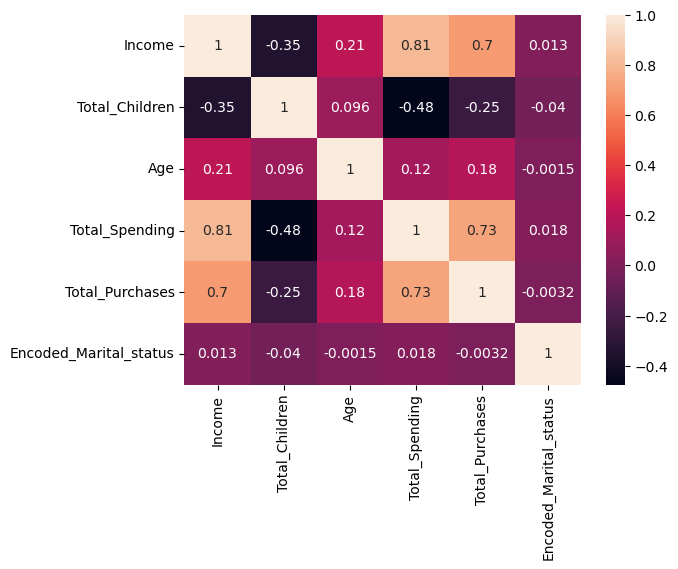

In [80]:
sns.heatmap(Correlation_Columns.corr(),annot=True)

### Inferences from Heat Map
##### Income and Total_Spending are highly positively/directly related to each other, showing that Income is a very important variable to predict the Total_Spending.
##### Whereas when we look at the relationship between Total_Spending and Total_Children, shows negative relationship which means Total_children is not an important variable to predict the Total_Spending.

## Hypothesis Testing

In [83]:
Marketing_Data.head()
Marketing_Data.columns

Index(['ID', 'Year_Birth', 'Education', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Country', 'Total_Children', 'Age', 'Total_Spending', 'Total_Purchases',
       'Response_Received', 'Complain_Received', 'Marital_Status_New',
       'Encoded_Marital_status'],
      dtype='object')

### ___7.1. Older individuals may not possess the same level of technological proficiency and may, therefore, lean toward traditional in-store shopping preferences.___

In [85]:
from scipy import stats

In [86]:
Store_purchasers= Marketing_Data.loc[Marketing_Data['Age'] >= 60,'NumStorePurchases']
Web_purchasers=Marketing_Data.loc[Marketing_Data['Age'] >= 60,'NumWebPurchases']
stats.ttest_ind(Store_purchasers,Web_purchasers)                                  

TtestResult(statistic=12.782786750393075, pvalue=8.416043903021212e-36, df=1710.0)

In [87]:
t_stat,p_value=stats.ttest_ind(Store_purchasers,Web_purchasers) 
print('T Stat value is :',t_stat)

T Stat value is : 12.782786750393075


In [88]:
print('P value is :',round(p_value,3),'or',p_value)

P value is : 0.0 or 8.416043903021212e-36


In [89]:
alpha = 0.05

In [90]:
if p_value < alpha:
    print('Reject the Null Hypothesis.')
    print('Hence Older Individuals do not possess same level of Technological Proficiency and lean toward in-store shopping.')
else:
    print('Failing to Reject the Null Hypothesis')   ### Accepting Alternate Hypothesis
    print('Hence Older Individuals possess same level of Technological Proficiency')

Reject the Null Hypothesis.
Hence Older Individuals do not possess same level of Technological Proficiency and lean toward in-store shopping.


### ___7.2. Customers with children likely experience time constraints, making online shopping a more convenient option.___

In [92]:
CustomerwithChildren_online_pur= Marketing_Data.loc[Marketing_Data['Total_Children']>= 1,'NumWebPurchases']
CustomerwithChildren_offline_pur= Marketing_Data.loc[Marketing_Data['Total_Children']>= 1,'NumStorePurchases']

In [93]:
t_stat,p_value=stats.ttest_ind(CustomerwithChildren_online_pur,CustomerwithChildren_offline_pur,alternative='greater')

In [94]:
print ('T stat value is :',t_stat)
print ('p value is :',p_value)

T stat value is : -11.87343265096376
p value is : 1.0


In [95]:
alpha = 0.05

In [96]:
if p_value < alpha:
    print('Reject the Null Hypothesis.')
    print('Customers with Children experience Time constraints and Online Shopping is more convenient')
else:
    print('Failing to Reject the Null Hypothesis.')
    print('Customers with children have enough time and do store purchases more often than online purchases.')

Failing to Reject the Null Hypothesis.
Customers with children have enough time and do store purchases more often than online purchases.


### 7.3.___Sales at physical stores may face the risk of cannibalization by alternative distribution channels___

In [98]:
Marketing_Data.columns

Index(['ID', 'Year_Birth', 'Education', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Country', 'Total_Children', 'Age', 'Total_Spending', 'Total_Purchases',
       'Response_Received', 'Complain_Received', 'Marital_Status_New',
       'Encoded_Marital_status'],
      dtype='object')

In [99]:
In_store_purchases= Marketing_Data.loc[:,'NumStorePurchases']
Other_purchases= Marketing_Data.loc[:,['NumWebPurchases','NumCatalogPurchases']].sum(axis=1)

In [100]:
T_stat,p_value=stats.ttest_ind(Other_purchases,In_store_purchases,alternative='greater')

In [101]:
if p_value < alpha:
    print('Reject the Null Hypothesis.')
    print('Sales may face risk of cannibalization due to alternative distribution channels.')
else:
     print('Failing to Reject the Null Hypothesis.')
     print('Sales do not face risk of cannibalization due to alternative distribution channels.')

Reject the Null Hypothesis.
Sales may face risk of cannibalization due to alternative distribution channels.


## 7.4.___Does the United States significantly outperform the rest of the world in total purchase volumes ?___

In [103]:
US_purchase=Marketing_Data.loc[Marketing_Data.Country=="US",'Total_Purchases']
Other_Country_purchase=Marketing_Data.loc[Marketing_Data.Country!="US",'Total_Purchases']

In [104]:
Test_stat_value,p_value=stats.ttest_ind(US_purchase,Other_Country_purchase,alternative='greater')

In [105]:
Test_stat_value

1.4387964124796926

In [106]:
if p_value < alpha:
    print('Reject Null Hypothesis.')
    print('US Sales are greater than rest of the world')
else:
    print('We failed to Reject Null Hypothesis')
    print('US Sales are less than rest of the world')

We failed to Reject Null Hypothesis
US Sales are less than rest of the world


## 8. ___Identify the top-performing products and those with the lowest revenue.___

In [108]:
Marketing_Data.columns

Index(['ID', 'Year_Birth', 'Education', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Country', 'Total_Children', 'Age', 'Total_Spending', 'Total_Purchases',
       'Response_Received', 'Complain_Received', 'Marital_Status_New',
       'Encoded_Marital_status'],
      dtype='object')

In [109]:
Data=Marketing_Data.loc[:,Marketing_Data.columns.str.startswith('Mnt')].mean()

In [110]:
Data

MntWines            304.991476
MntFruits            26.348587
MntMeatProducts     165.283984
MntFishProducts      37.642441
MntSweetProducts     27.161507
MntGoldProds         44.113055
dtype: float64

In [111]:
Data.sort_values(ascending= False,inplace=True)

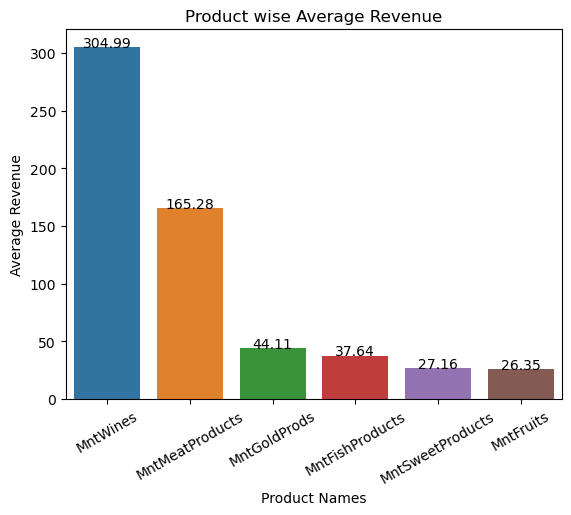

In [112]:
x=Data.index
y=Data.values
Bar=sns.barplot(x=x,y=y,order=x,hue=x).set_xticklabels(sns.barplot(x=x,y=y,hue=x).get_xticklabels(),rotation=30)

plt.xlabel('Product Names')
plt.ylabel('Average Revenue')
plt.title('Product wise Average Revenue')

for i in range(len(x)):
     plt.text(i, y[i],round( y[i],2), ha = 'center')

## 8.b) ___Examine if there is a correlation between customers' age and the acceptance rate of the last campaign___

In [114]:
df=Marketing_Data['Age']

In [115]:
def age_range(x):
  bins=[28,40,50,60,70,80,90]
  labels=['28-40','41-50','51-60','61-70','71-80','81-90']
  Marketing_Data['Age_group']= pd.cut(x=df,bins=bins,labels=labels,right=False)  
  result = Marketing_Data['Age_group']
  return  result


In [116]:
Marketing_Data['Age_group']=age_range(Marketing_Data['Age'])
#Marketing_Data[['Age','Age_group']]
Marketing_Data.head()


,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Country,Total_Children,Age,Total_Spending,Total_Purchases,Response_Received,Complain_Received,Marital_Status_New,Encoded_Marital_status,Age_group
0,1826,1970,Graduation,84835.0,0,0,2014-06-16,0,189,104,...,SP,0,55,672,15,True,False,single,1,51-60
1,1,1961,Graduation,57091.0,0,0,2014-06-15,0,464,5,...,CA,0,64,533,18,True,False,single,1,61-70
2,10476,1958,Graduation,67267.0,0,1,2014-05-13,0,134,11,...,US,1,67,204,11,False,False,committed,0,61-70
3,1386,1967,Graduation,32474.0,1,1,2014-05-11,0,10,0,...,AUS,2,58,11,4,False,False,committed,0,51-60
4,5371,1989,Graduation,21474.0,1,0,2014-04-08,0,6,16,...,SP,1,36,46,8,True,False,single,1,28-40


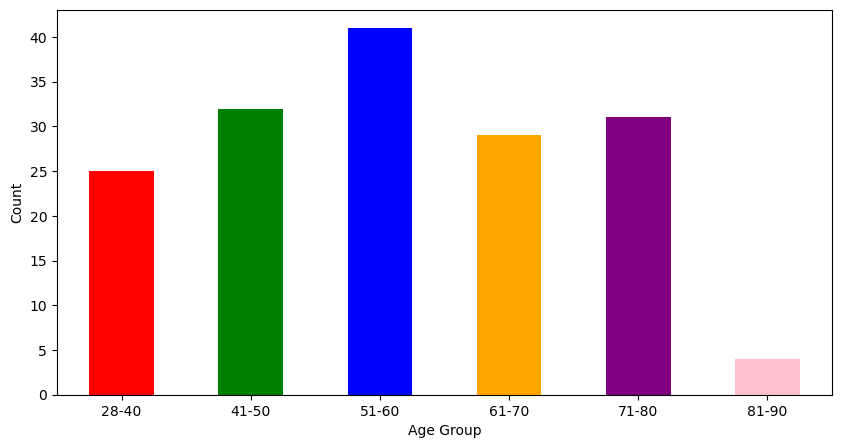

In [117]:
chart= Marketing_Data[Marketing_Data.AcceptedCmp5==1].Age_group.value_counts().sort_index()
plt.figure(figsize=(10,5))
chart.plot.bar(color=['Red','Green','Blue','Orange','Purple','Pink'])
#plt.bar(chart)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [118]:
chart

Age_group
28-40    25
41-50    32
51-60    41
61-70    29
71-80    31
81-90     4
Name: count, dtype: int64

## 51-60 Age group has accepted highest number of Campaigns accepted and 81-90 has lowest number of accepted campaigns.

## 8.c) Determine the country with the highest number of customers who accepted the last campaign

In [121]:
Last_Accepted_Data=Marketing_Data[Marketing_Data['AcceptedCmp5']==1] #[['Country','AcceptedCmp5']]

In [122]:
groupbycountrydata= Last_Accepted_Data.groupby('Country')

In [123]:
finalcount= groupbycountrydata.agg(func='count')['AcceptedCmp5']

In [124]:
plot_data=finalcount.sort_values(axis=0,ascending=False)
plot_data

Country
SP     88
CA     21
SA     21
AUS    13
GER     8
IND     6
US      5
Name: AcceptedCmp5, dtype: int64

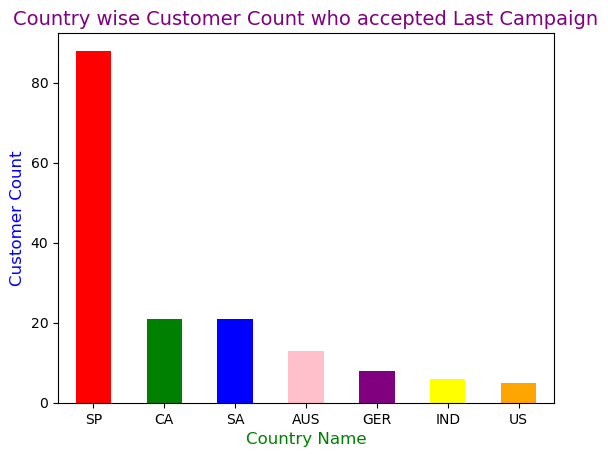

In [125]:
plot_data.plot.bar(color=['Red','Green','Blue','Pink','Purple','Yellow','Orange'])
plt.xticks(rotation=0)
plt.xlabel('Country Name',color='Green',size=12)
plt.ylabel('Customer Count',color='Blue',size=12)
plt.title('Country wise Customer Count who accepted Last Campaign',color='Purple',size=14)
plt.show()

## Analysis : From the chart, it is clearly visible that SP country has the maximum number of customers who have accepted the Last campaign held. 

## 8.d) ___Investigate if there is a discernible pattern in the number of children at home and the total expenditure.___

In [128]:
Marketing_Data[['Total_Spending','Total_Children']]

,Total_Spending,Total_Children
0,672,0
1,533,0
2,204,1
3,11,2
4,46,1
...,...,...
2235,516,1
2236,28,1
2237,275,1
2238,1006,0


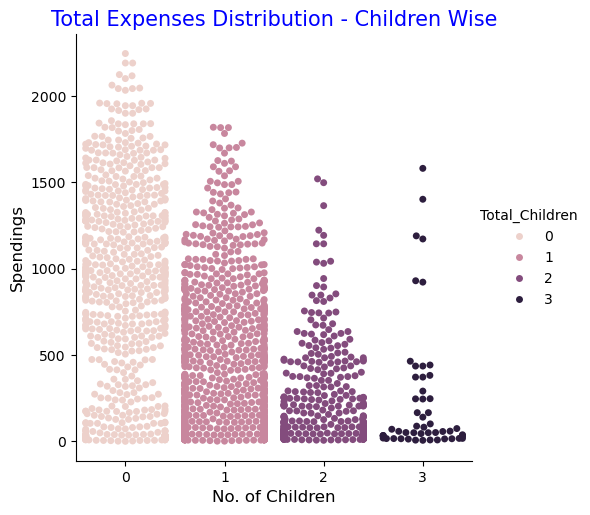

In [129]:
sns.catplot(x='Total_Children',y='Total_Spending',data=Marketing_Data,kind="swarm",hue='Total_Children')
plt.xlabel('No. of Children',size=12)
plt.ylabel('Spendings',size=12)
plt.title('Total Expenses Distribution - Children Wise', size= 15,color='Blue')
plt.show()

## Analysis: It is noticed that Total Spendings are higher where there is no children at home and spendings are lower where number of childrens is maximum(i.e.=3)

## 8.e) ___Analyze the educational background of customers who lodged complaints in the last two years.___

In [248]:
Education=Marketing_Data[Marketing_Data['Complain_Received'] ==True] ['Education']

In [264]:
Data_Education=Education.value_counts()

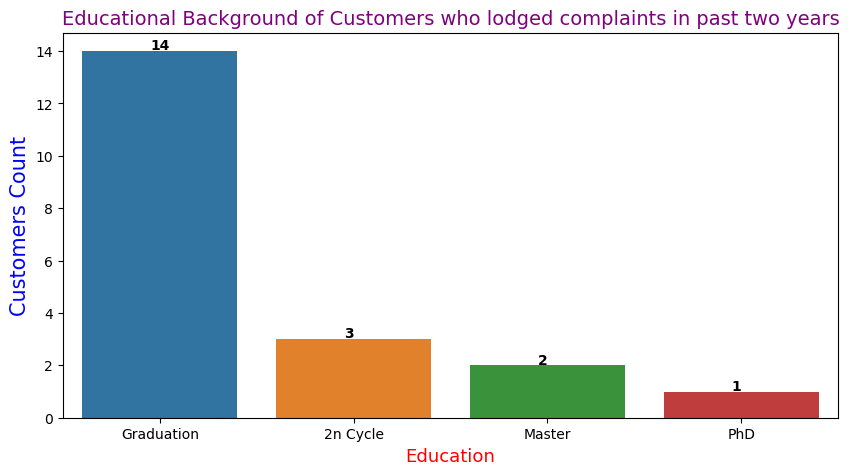

In [328]:
plt.figure(figsize=(10,5))
sns.barplot(x=Data_Education.index,y=Data_Education.values,hue=Data_Education.index)
plt.title('Educational Background of Customers who lodged complaints in past two years',color='Purple',size=14)
plt.xlabel('Education',color='Red',size=13)
plt.ylabel('Customers Count',color='Blue',size=15)
for i in range(Data_Education.size):
    plt.annotate(Data_Education[i],xy=(i-0.05,Data_Education[i]+0.05 ),weight='heavy')
plt.show()

## Analysis: In the last two years highest number of complains made were from Graduates with number of 14 customers.